## <a id='toc1_1_'></a>[EDA on sub-sampled dataset](#toc0_)
**Name**: Soniya Sharma  
**Contact**: soniya.iiser@gmail.com  
**Date**: 02/22/2025  

**Table of contents**<a id='toc0_'></a>    
- [EDA on sub-sampled dataset](#toc1_1_)    
    - [Introduction](#toc1_1_1_)    
      - [Importing Python Libraries](#toc1_1_1_1_)    
      - [Loading Clean Dataset](#toc1_1_1_2_)    
      - [Data Dictionary](#toc1_1_1_3_)    
      - [Redundant Columns](#toc1_1_1_4_)    
    - [Exploring Product Ratings and Reviews](#toc1_1_2_)    
    - [Exploring Product Categories](#toc1_1_3_)    
    - [Exploring New Features](#toc1_1_4_)    
      - [Analysis of Top 10 Reviewers](#toc1_1_4_1_)    
    - [Conclusion](#toc1_1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[Introduction](#toc0_)

In this notebook, we perform Exploratory Data Analysis (EDA), a key step in uncovering insights, identifying patterns, and detecting trends within the dataset. Using visualizations and statistical methods, we deepen our understanding of the data, enabling us to extract meaningful information that will guide the development of our forecasting algorithm.

#### <a id='toc1_1_1_1_'></a>[Importing Python Libraries](#toc0_)

Importing necessary libraries for data pre-processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import string

# Ignore all warnings to avoid cluttering the output
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Useful settings

#pd.set_option('display.max_columns', None) # show all dataframe columns

plt.rcParams['figure.figsize'] = (8.0, 6.0) # set matplotlib global settings eg. figsize
# plt.rcParams['font.size']=17              # useful when saving figures
sns.set_style("darkgrid")                   #Setting grid style in seaborn

#pd.set_option('display.max_colwidth', 1000)  # display long column titles

#### <a id='toc1_1_1_2_'></a>[Loading Clean Dataset](#toc0_)

In [3]:
# Load the pickled user_data DataFrame
user_df = pd.read_pickle('../data/user_sample_handmade.pkl')
user_df.head()

,rating_by_user,title_review,text_review,images_review,product_id,parent_asin,user_id,time_of_review,helpful_vote,verified_purchase,...,Package Dimensions,orig_department,Date First Available,date_first_available,package_dimensions_inches,package_weight_ounces,package_length_inches,package_width_inches,package_height_inches,department
0,5,Beautiful colors,I bought one for myself and one for my grandda...,[],B08GPJ1MSN,B08GPJ1MSN,AF7OANMNHQJC3PD4HRPX2FATECPA,2021-05-21 14:31:35.111,1,True,...,4.37 x 3.43 x 0.67 inches; 1.27 Ounces,Unisex-adult,"September 9, 2020",2020-09-09,4.37 x 3.43 x 0.67 inches,1.27,4.37,3.43,0.67,unisex
1,5,Great,As pictured. Used a frame from the dollar stor...,[],B07V3NRQC4,B07V3NRQC4,AEYORY2AVPMCPDV57CE337YU5LXA,2020-06-06 13:09:11.297,0,True,...,14.7 x 12.4 x 0.2 inches; 3.53 Ounces,NaN,"July 11, 2019",2019-07-11,14.7 x 12.4 x 0.2 inches,3.53,14.70,12.40,0.20,NaN
2,5,These are beautiful,I have several of these prints. Yes the size i...,[],B09ZXMD847,B09ZXTLVWP,AFGNIWCBLQT2QIXXKIW7Q6VREZRQ,2022-11-13 07:11:04.824,29,False,...,12.52 x 1.22 x 1.14 inches; 2.4 Ounces,NaN,"May 10, 2022",2022-05-10,12.52 x 1.22 x 1.14 inches,2.40,12.52,1.22,1.14,NaN
3,5,fair trade necklace,"This is a very lovely, fair trade necklace mad...",[],B07PWBRXJG,B07PWBRXJG,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2020-12-05 19:21:29.380,1,True,...,4.49 x 4.21 x 2.05 inches; 3.32 Ounces,Womens,"March 20, 2019",2019-03-20,4.49 x 4.21 x 2.05 inches,3.32,4.49,4.21,2.05,women
4,5,Set of 2 Fair Trade bracelets,I purchased about 5 different color combos of ...,[],B0855GMD9K,B0855GMD9K,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2020-12-04 19:15:16.926,7,True,...,6.18 x 4.8 x 1.38 inches; 3.21 Ounces,Womens,"February 26, 2020",2020-02-26,6.18 x 4.8 x 1.38 inches,3.21,6.18,4.80,1.38,women


#### <a id='toc1_1_1_3_'></a>[Data Dictionary](#toc0_)

| Column Name                | Data Type     | Description                                                                                   |
|----------------------------|---------------|-----------------------------------------------------------------------------------------------|
| `rating_by_user`       | int64          | Rating given by the user. |
| `title_review`         | object         | Title of the user's review. |
| `text_review`         | object         | Full text of the user's review. |
| `product_id`          | object         | Unique identifier for the reviewed product. |
| `user_id`             | object         | Unique identifier for the user. |
| `time_of_review`      | datetime64[ns] | Timestamp when the review was written. |
| `helpful_vote`        | int64          | Number of users who found the review helpful. |
| `verified_purchase`   | bool           | Whether the user purchased the product. |                                            |
| `title_product`                   | object        | Name of the product.                                                                          |
| `average_rating`          | float64       | Rating of the product on the product page.                                                    |
| `date_first_available`    | datetime64[ns]| Date when the product was first available for purchase.   
| `rating_number`           | int64         | Number of ratings for the product.                                                            |
| `features`                | object        | List of features of the product.                                                  |
| `description`             | object        | Description of the product.                                                                   |
| `price`                   | float64       | Price in US dollars                                                  |
| `store`                   | object        | Store name where the product is sold.                                                         |                                                    |
| `parent_asin`             | object        | Parent ID of the product.                                                                     |
| `sub_category_1`          | object        | First sub-category of the product.                                                            |
| `sub_category_2`          | object        | Second sub-category of the product.                                                           |
| `sub_category_3`          | object        | Third sub-category of the product.                                                            |                                    |
| `combined_category`          | object        | Combined category of the product.                                                            |                                    |
| `package_dimensions_inches`   | object              | Package dimensions in inches.                                                                                                               |
| `package_weight_ounces`       | float64             | Package weight in ounces.                                                                                                              |
| `package_length_inches`       | float64             | Package length in inches.                                                                                                              |
| `package_width_inches`        | float64             | Package width in inches.                                                                                                               |
| `package_height_inches`       | float64             | Package height in inches.                                                                                                              |
| `department`         | object              | Cleaned department names for the product.                                                                                             |
---

#### <a id='toc1_1_1_4_'></a>[Redundant Columns](#toc0_)

These columns have been marked as either redundant (i.e., containing similar or duplicated data) or unnecessary for the analysis. They are retained for reference but will not be used in further analysis.

| Column Name                | Data Type     | Description                                                                                   |
|----------------------------|---------------|-----------------------------------------------------------------------------------------------|
| `main_category`           | object        | Main category of the product - all are handmade products.      
| `categories`              | object        | Hierarchical categories, already present in `main_category` and `sub_category_1,2,3`.          |
| `details`                 | object        | Product details such as materials, brand, etc., already incorporated in other columns.       |
| `orig_department`              | object        | Original department column, similar to `department`.                                  |
|`Package Dimensions`          | object              | Package dimensions already split into `package_length_inches`,`package_width_inches,`package_height_inches`.  
| `videos`                  | object        | Videos related to the product, not relevant to analysis.                                      |
| `images`                  | object        | Product images not relevant for the analysis.                    |
| `Date First Available`    | object | Date when the product was first available for purchase.   

In [4]:
#Drop redundant columns
user_df.drop(columns=['categories','details','orig_department','Package Dimensions',
                      'videos','images_review','images_product'],inplace=True)

In [5]:
# Display concise information 
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236598 entries, 0 to 236597
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   rating_by_user             236598 non-null  int64         
 1   title_review               236598 non-null  object        
 2   text_review                236598 non-null  object        
 3   product_id                 236598 non-null  object        
 4   parent_asin                236598 non-null  object        
 5   user_id                    236598 non-null  object        
 6   time_of_review             236598 non-null  datetime64[ns]
 7   helpful_vote               236598 non-null  int64         
 8   verified_purchase          236598 non-null  bool          
 9   main_category              236598 non-null  object        
 10  title_product              236598 non-null  object        
 11  average_rating             236598 non-null  float64 

In [6]:
#Check null values
user_df.isna().mean()

rating_by_user               0.000000
title_review                 0.000000
text_review                  0.000000
product_id                   0.000000
parent_asin                  0.000000
user_id                      0.000000
time_of_review               0.000000
helpful_vote                 0.000000
verified_purchase            0.000000
main_category                0.000000
title_product                0.000000
average_rating               0.000000
rating_number                0.000000
features                     0.000000
description                  0.000000
price                        0.000000
store                        0.000000
sub_category_1               0.000000
sub_category_2               0.030119
sub_category_3               0.431263
combined_category            0.000000
Date First Available         0.000000
date_first_available         0.000000
package_dimensions_inches    0.449061
package_weight_ounces        0.460718
package_length_inches        0.449061
package_widt

In [7]:
#checking descriptive statistics of price
user_df['price'].describe()

count    236598.000000
mean         31.551594
std         214.039918
min           0.010000
25%          13.950000
50%          19.990000
75%          31.000000
max      100000.000000
Name: price, dtype: float64

In [8]:
#To ensure a more meaningful analysis, we filter out products with extreme prices above $500.

user_df = user_df[user_df['price']<500].reset_index(drop=True)

### <a id='toc1_1_2_'></a>[Exploring Product Ratings and Reviews](#toc0_)

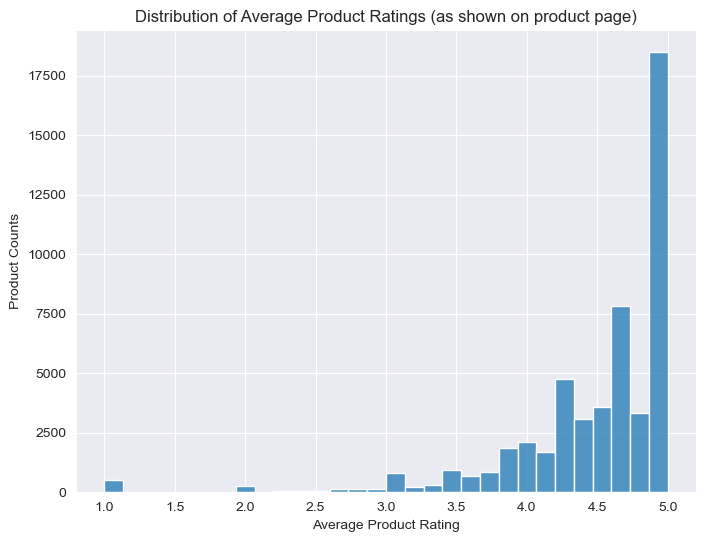

In [9]:
# Plot a histogram of average product ratings (these ratings are published on the product page)

# Grouping reviews by product_id to compute the average rating per product.
mean_ratings_per_product = user_df.groupby(by='product_id')['average_rating'].agg(['mean','count'])

#Rename column names
mean_ratings_per_product.rename(columns={'mean':'avg_product_rating','count':'review_counts'},inplace=True)

sns.histplot(mean_ratings_per_product['avg_product_rating'],bins=30)

plt.title('Distribution of Average Product Ratings (as shown on product page)')

plt.xlabel('Average Product Rating')
plt.ylabel('Product Counts')

#plt.yscale('log')  # Applying logarithmic scale to the y-axis
plt.show()

**Average Rating** The histogram shows that the majority of products have high average ratings, with a peak around 4.5 to 5. This indicates that most products in the dataset are well-received by customers. There are very few products with average ratings below 3, indicating that poor-quality products are rare in this dataset.

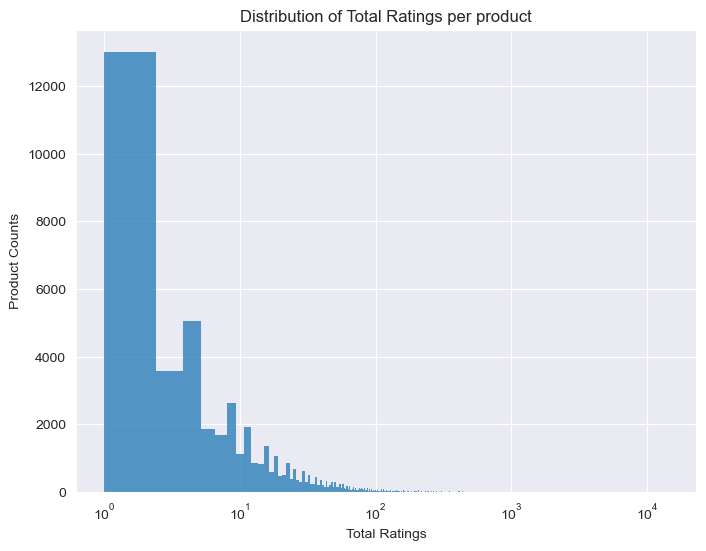

In [10]:
# Plot a histogram of total number of ratings received by different products

# Compute the total number of ratings per product
# 'rating_number' represents the number of ratings a product has received - calculating mean to avoid duplication
mean_ratings_per_product['total_ratings'] = user_df.groupby(by='product_id')['rating_number'].mean()
#with sns.axes_style('white'):
plt.figure()
sns.histplot(mean_ratings_per_product['total_ratings'])

plt.title('Distribution of Total Ratings per product')
plt.xlabel('Total Ratings')
plt.ylabel('Product Counts')

plt.xscale('log')  # Applying logarithmic scale to the x-axis

plt.show()

**Total number of ratings**: The histogram of total number of ratings reveals a right-skewed distribution, where most products receive relatively few ratings, while a small number of products accumulate significantly higher ratings.

So far, we have examined the ratings provided in the metadata. Now, let's analyze product ratings based on the reviews given by users.

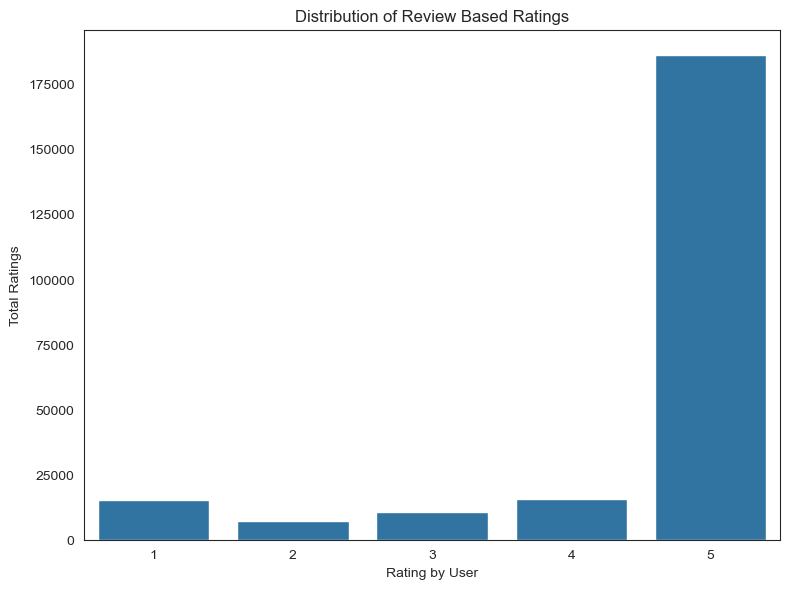

In [11]:
#Checking Ratings given by User
with sns.axes_style('white'):
   sns.countplot(x="rating_by_user", data=user_df)
   plt.ylabel("Total Ratings")
   plt.xlabel("Rating by User")
   plt.title("Distribution of Review Based Ratings")
   
   plt.tight_layout()
   plt.show()

**Review based ratings** The bar plot shows the distribution of ratings given by users for different products. As seen previously, the dataset is highly skewed towards a perfect rating of 5, with a significant number of users consistently providing top ratings.

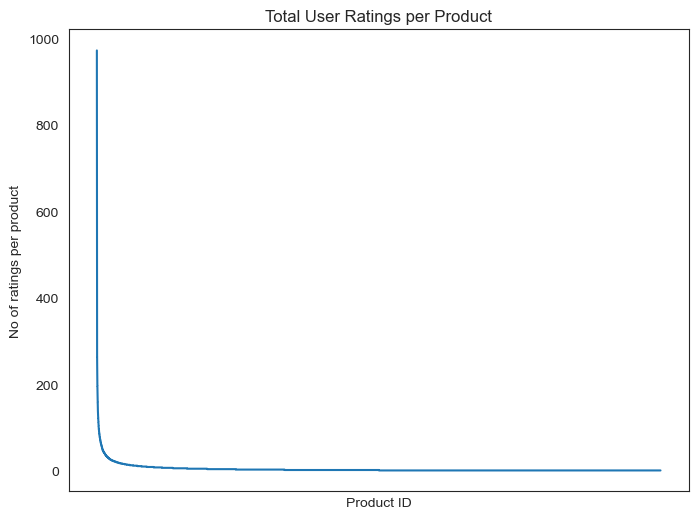

In [12]:
#Plot review counts per product 

no_of_ratings_per_product = user_df.groupby(by='product_id')['average_rating'].count().sort_values(ascending=False)

with sns.axes_style('white'):
    plt.plot(no_of_ratings_per_product.values)

    plt.title('Total User Ratings per Product')
    plt.xlabel('Product ID')
    plt.ylabel('No of ratings per product')

    plt.xticks(ticks=[], labels =[])
    #plt.yscale('log')
    plt.show()


**Ratings per product**- The plot shows the distribution of no of ratings given per product-ID. Xaxis labels have been avoided for clarity. About 50% of products have only 1 review per product.

Text(0.5, 1.0, 'Distribution of Review Counts per Product')

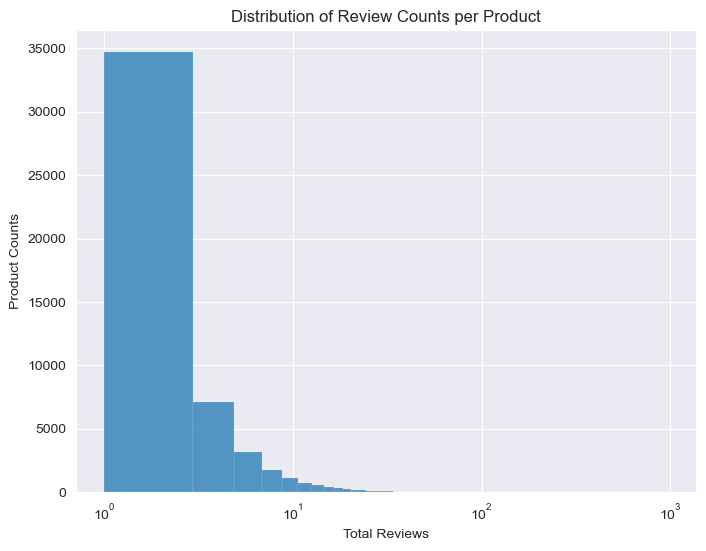

In [13]:
# Differnt plot showing the same result as above

#Plot mean ratings per product on the basis of ratings given by user
mean_ratings_per_product['avg_rating_by_user'] = user_df.groupby(by='product_id')['rating_by_user'].mean()

#Rename column names
mean_ratings_per_product.rename(columns={'mean':'avg_rating_by_user','count':'review_counts'},inplace=True)

sns.histplot(x="review_counts", data=mean_ratings_per_product,bins=500)
plt.xlabel("Total Reviews")
plt.ylabel("Product Counts")
plt.xscale('log')
plt.title("Distribution of Review Counts per Product")

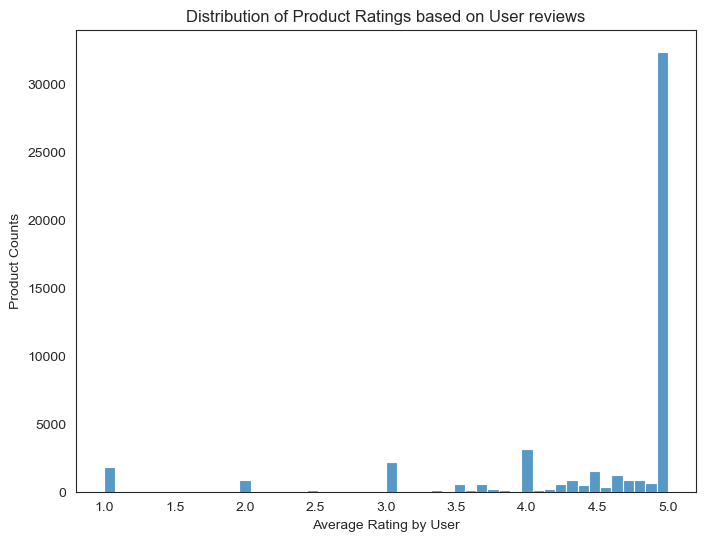

In [ ]:
## plot distribution of ratings based on user reviews
with sns.axes_style('white'):
   sns.histplot(x="avg_rating_by_user", data=mean_ratings_per_product,bins=50)
   plt.xlabel("Average Rating by User")
   plt.ylabel("Product Counts")
   #plt.yscale('log')
   plt.title("Distribution of Product Ratings based on User reviews")

**Average rating by user** -Not unexpected—most products receive higher average ratings even from user reviews, indicating a distribution similar to what we observed for product ratings displayed on the product page.  

The key difference between the two plots is that the previous one showed a smoother distribution since it included all ratings, not just those from users who left a review.

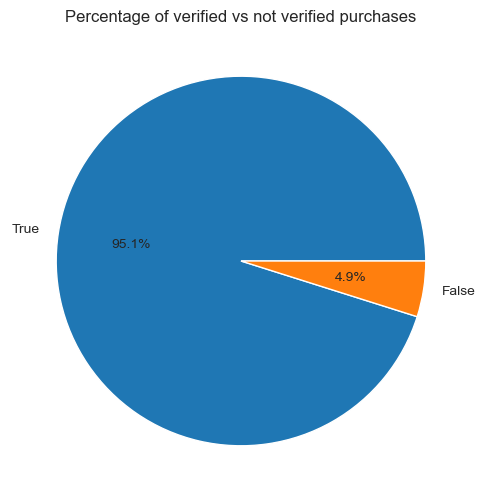

In [15]:
# Visualize the percentage of verified vs not verified reviews using a pie chart
df_values = user_df['verified_purchase'].value_counts()
df_values.plot(kind = 'pie' ,autopct='%1.1f%%')
plt.title('Percentage of verified vs not verified purchases')
plt.ylabel('')

plt.show()

**Pie Chart** - About 5% of reviews are not coming from verified purchases.

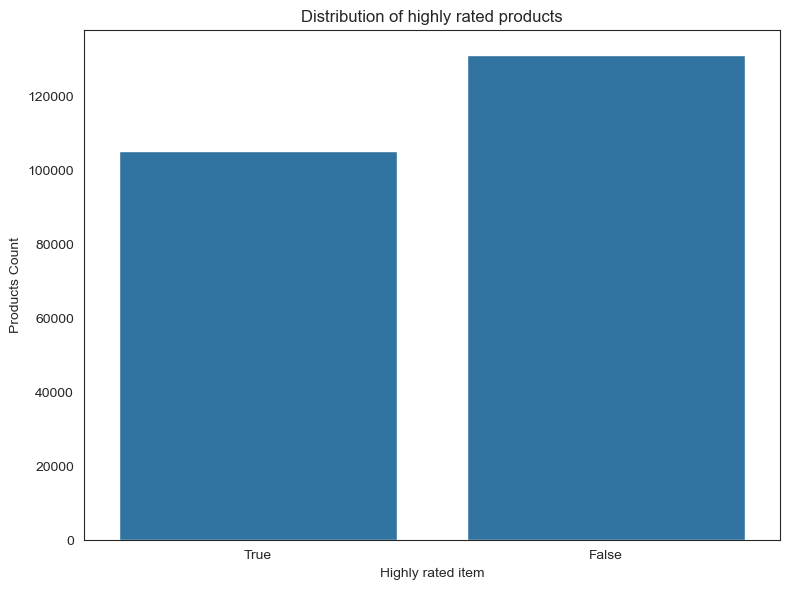

In [16]:
#plot frequency of highly rated products

#create a new column using two conditions 
# - average_rating of the product > 4 
# - mean ratings by user for that product >4.5
user_df['mean_user_rating'] = user_df.groupby('product_id')['rating_by_user'].transform('mean')

user_df['highly_rated_item'] = np.where((user_df['mean_user_rating'] > 4.5) 
                                & (user_df['average_rating'] > 4.5), 1, 0).astype('bool')

with sns.axes_style('white'):
    sns.countplot(x= user_df['highly_rated_item'],order=[True,False])

    plt.title('Distribution of highly rated products')

    plt.xlabel('Highly rated item')
    plt.ylabel('Products Count')
    
    plt.tight_layout()
    
    plt.show()

Since the data is heavily skewed towards higher ratings- instead of predicting the average rating of the item, we could consider predicting whether a product will be highly rated or not.  `highly_rated_item` column  classifies whether a product will get an average rating > 4.5 as well average user rating > 4.5. As we can see that our dataset is roughly balanced for this target freature.

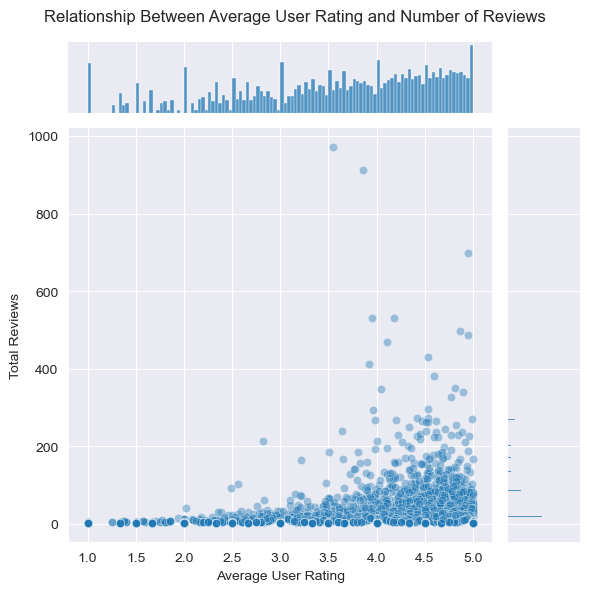

In [ ]:
#Joint plot of Number of reviews vs user ratings for every product
sns.jointplot(x='avg_rating_by_user', y='review_counts', data=mean_ratings_per_product, alpha=0.4,marginal_kws={"log": True})

plt.suptitle('Relationship Between Average User Rating and Number of Reviews')

plt.xlabel('Average User Rating')
plt.ylabel('Total Reviews')

plt.tight_layout()
plt.show()


**Average User Rating and Number of reviews**- The plot shows the relationship between the average user rating and the total number of reviews, highlighting an increasing trend—products with higher ratings tend to have more user reviews.

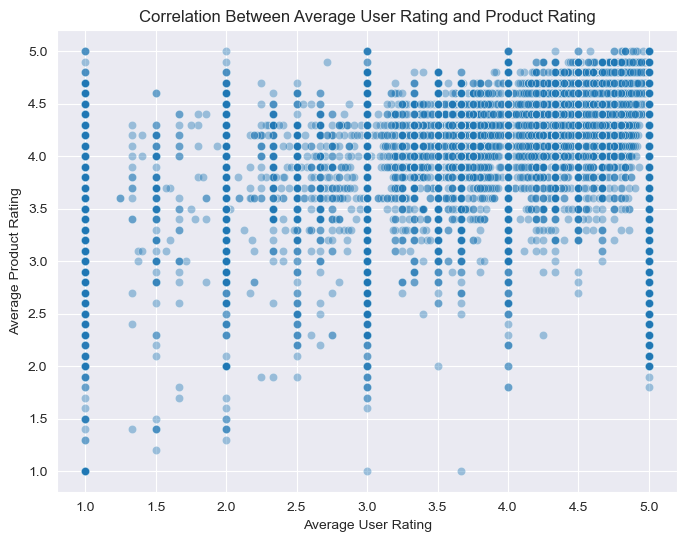

In [ ]:
#plot scatter plot between user rating and product rating (as shown on the product page)
sns.scatterplot(x='avg_rating_by_user', y='avg_product_rating', data=mean_ratings_per_product, alpha=0.4)

plt.xlabel('Average User Rating')
plt.ylabel('Average Product Rating')

plt.title('Correlation Between Average User Rating and Product Rating')

plt.show()


The scatter plot shows a strong correlation between average user ratings and product ratings displayed on the product page. This indicates that the ratings given by reviewers are generally in sync with the overall product rating.

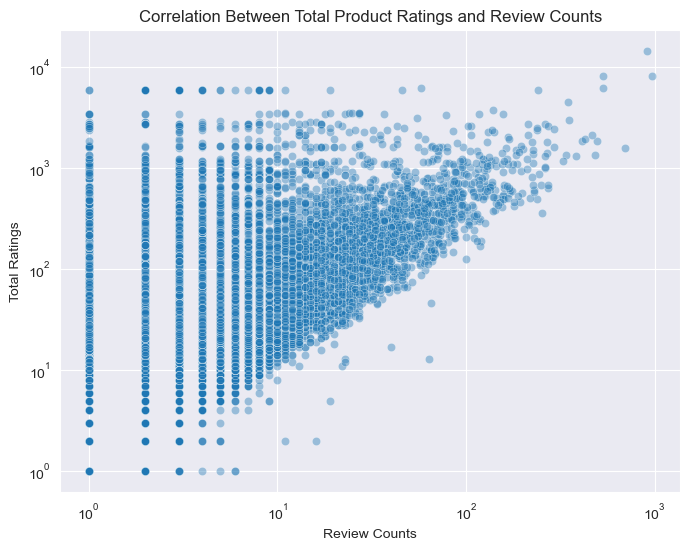

In [ ]:
#scatter plot to check relationship between total ratings and no of reviews per product
sns.scatterplot(y='total_ratings', x='review_counts', data=mean_ratings_per_product, alpha=0.4)

plt.ylabel('Total Ratings')
plt.xlabel('Review Counts')

plt.title('Correlation Between Total Product Ratings and Review Counts')

plt.xscale('log')
plt.yscale('log')

As expected, total number of product ratings listed on the product page are correlated strongly with the number of user based ratings.

### <a id='toc1_1_3_'></a>[Exploring Product Categories](#toc0_)

In [20]:
# Load the pickled meta DataFrame
meta_df = pd.read_pickle('../data/meta_sample_handmade.pkl')

#removing extreme prices
meta_df = meta_df[meta_df['price']<500].reset_index(drop=True)
meta_df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,...,Package Dimensions,orig_department,Date First Available,date_first_available,package_dimensions_inches,package_weight_ounces,package_length_inches,package_width_inches,package_height_inches,department
0,Handmade,Sterling Silver Hammered Ear Cuff,4.4,243,"[Solid Sterling Silver, Artisan Handcrafted, C...",[This simple ear cuff is made with solid Sterl...,24.00,[{'thumb': 'https://m.media-amazon.com/images/...,[],Twisted Designs Jewelry,...,3.62 x 2.05 x 0.83 inches; 0.46 Ounces,unisex-adult,"October 27, 2015",2015-10-27,3.62 x 2.05 x 0.83 inches,0.46,3.62,2.05,0.83,unisex
1,Handmade,Witch Cigarette Case Business Card ID Holder W...,5.0,1,[],[This silver-tone metal case can be used as a ...,12.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,...,NaN,unisex-adult,"January 10, 2018",2018-01-10,NaN,NaN,NaN,NaN,NaN,unisex
2,Handmade,"Humorous Cat Wall Art - Decor for Home, Office...",4.5,108,[8x10 UNFRAMED PRINTS - NOT Canvas or Tin Sign...,[8x10 UNFRAMED Prints],12.95,[{'thumb': 'https://m.media-amazon.com/images/...,[],YELLOWBIRD ART & DESIGN,...,11.2 x 8.8 x 0.2 inches; 3.21 Ounces,NaN,"November 5, 2019",2019-11-05,11.2 x 8.8 x 0.2 inches,3.21,11.20,8.80,0.20,NaN
3,Handmade,Whiskey Glasses by Black Lantern – Floral Whis...,4.4,11,[PREMIUM GLASSWARE READY TO GIFT - Our glasses...,[],31.00,[{'thumb': 'https://m.media-amazon.com/images/...,[],Black Lantern,...,9 x 7 x 5 inches,NaN,"January 26, 2016",2016-01-26,9 x 7 x 5 inches,NaN,9.00,7.00,5.00,NaN
4,Handmade,LOVE Dog Paw Print Heart Sticker Decal Compati...,4.1,3,[],"[Decal Size: 1"" Tall X 3.2"" Wide Die cut out o...",3.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Generic,...,NaN,Womens,"November 14, 2016",2016-11-14,NaN,NaN,NaN,NaN,NaN,women


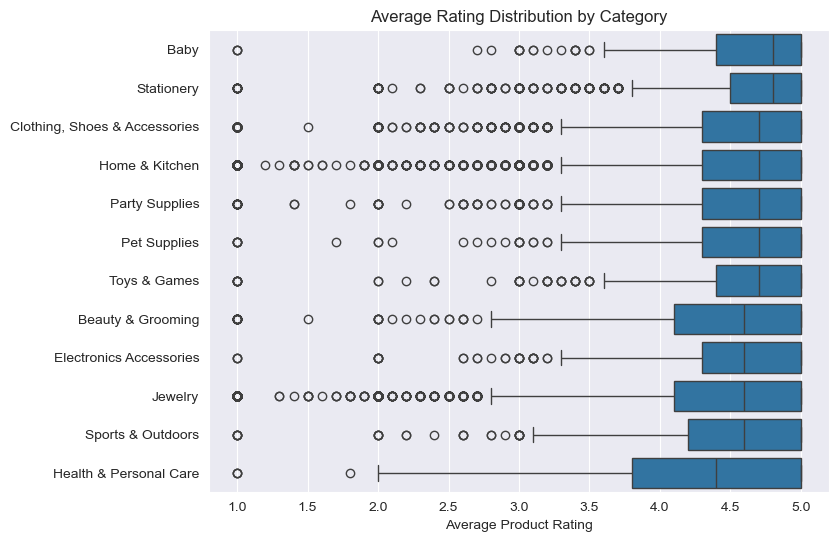

In [21]:
# Plot a boxplot of Average Rating by Sub Category 1

# group by sub-category and sort the average_rating in descending order
sorted_order = meta_df.groupby('sub_category_1')['average_rating'].median().sort_values(ascending=False).index.tolist()

# Create the boxplot with sorted categories
sns.boxplot(y=meta_df['sub_category_1'], x=meta_df['average_rating'], order=sorted_order)

# Title and labels
plt.title('Average Rating Distribution by Category')
plt.xlabel('Average Product Rating')
plt.ylabel('')

# Show the plot
plt.show()


**Box plot of average rating**: The box plot shows the distribution of ratings for different categories. We can see that the average rating does not vary significantly across broader product categories. There are outliers in each price range, indicating that some products have an unusually high number of ratings compared to others in the same category. The *Baby* category has the highest average rating, while *Health and Personal Care* has the lowest.

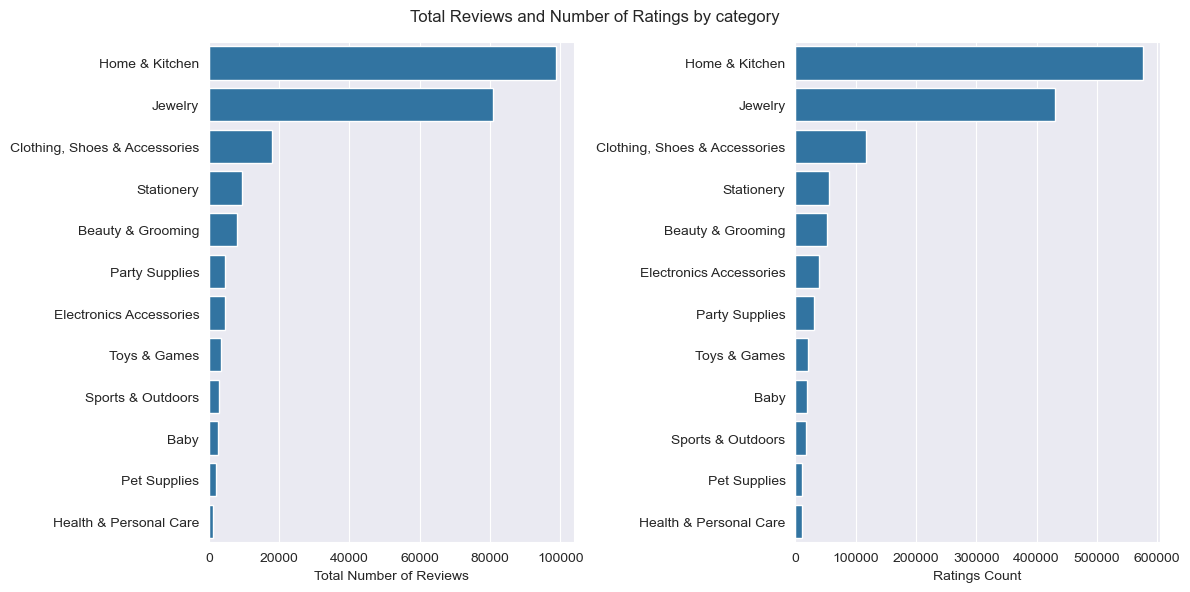

In [23]:
# Create the barplot of total number of user reviews per category

fig,ax = plt.subplots(1,2,figsize=(12,6)) #define canvas

# group by sub-category and sort the rating_by_user in descending order
sorted_order = user_df.groupby('sub_category_1')['rating_by_user'].count().sort_values(ascending=False).index.tolist()

sns.barplot(y=user_df.groupby('sub_category_1')['rating_by_user'].count().index,
            x=user_df.groupby('sub_category_1')['rating_by_user'].count().values,
            order=sorted_order,ax=ax[0])

ax[0].set_xlabel('Total Number of Reviews')
ax[0].set_ylabel('')

#ax[0].set_xscale('log')  # Applying logarithmic scale to the x-axis

sorted_order = meta_df.groupby('sub_category_1')['rating_number'].sum().sort_values(ascending=False).index.tolist()

sns.barplot(y=meta_df.groupby('sub_category_1')['rating_number'].sum().index,
            x=meta_df.groupby('sub_category_1')['rating_number'].sum().values,
            order=sorted_order,ax=ax[1])

ax[1].set_xlabel('Ratings Count')
ax[1].set_ylabel('')

#ax[1].set_xscale('log')  # Applying logarithmic scale to the x-axis

plt.suptitle('Total Reviews and Number of Ratings by category')
plt.tight_layout()
plt.show()

**Total Ratings/Reviews by category** - *Home and Kitchen* has the highest number of reviews, while *Health & Personal Care* has the lowest. This trend is consistent with the total number of ratings, indicating that categories with a higher number of ratings also tend to have more reviews, as expected.

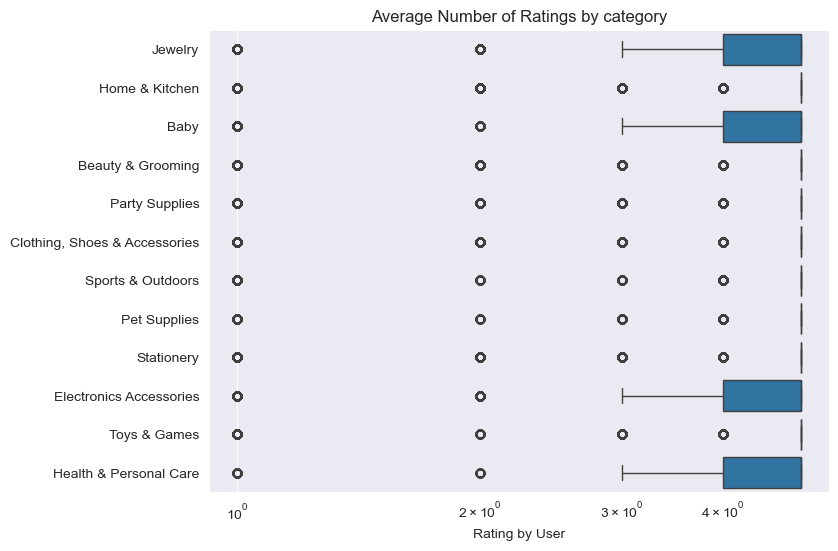

In [24]:
# Plot a boxplot of total ratings by Sub Category 1

# Create the boxplot with sorted categories
sns.boxplot(y=user_df['sub_category_1'], x=user_df['rating_by_user'])

# Title and labels
plt.title('Average Number of Ratings by category')
plt.xlabel('Rating by User')
plt.ylabel('')

plt.xscale('log')  # Applying logarithmic scale to the x-axis

plt.show()

**Boxplot of User Ratings** - Most categories have user ratings tightly centered around 5. While there are outliers in all categories, there is very little variation in ratings. *Jewellery*, *Electronics Accessories*, *Baby*, and *Health and Personal Care* are the only sub-categories with a noticeable spread in user ratings. As seen before *Jewellery* has the second-highest number of reviews, possibly leading to a wider range of opinions, while *Health and Personal Care* has the lowest number of reviews, which may contribute to greater variability in ratings. 

It is worth pointing out that *Home & Kitchen*, despite being the highest-reviewed category, is remarkably concentrated around a rating of 5.

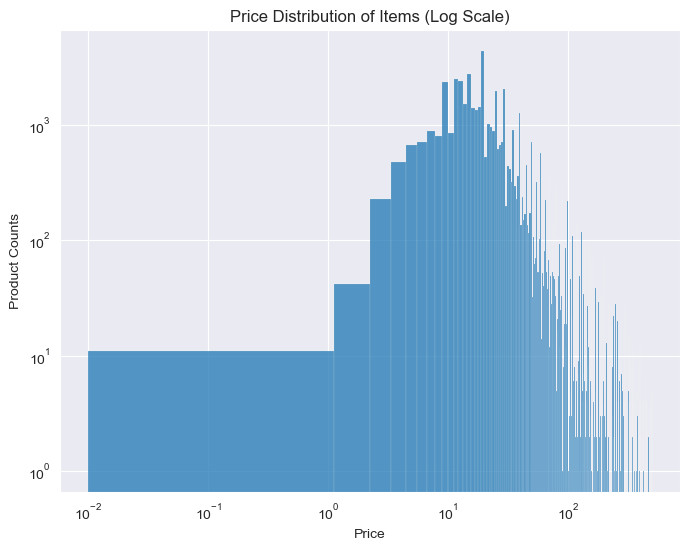

In [25]:
# Plot a histogram of prices for different products

# Plotting the histogram for prices
sns.histplot(meta_df.groupby('parent_asin')['price'].mean())

plt.title('Price Distribution of Items (Log Scale)')
plt.xlabel('Price')
plt.ylabel('Product Counts')

plt.xscale('log')  # Applying logarithmic scale to the x-axis
plt.yscale('log')  # Applying logarithmic scale to the y-axis
plt.show()

**Price Distribution** The histogram reveals that the majority of items are priced on the lower end, with a significant concentration of items priced below $100. This suggests that the dataset is skewed towards more affordable products.
The use of a log scale helps to better visualize the distribution, especially when dealing with a wide range of values. It allows us to see the distribution of lower-priced items more clearly.



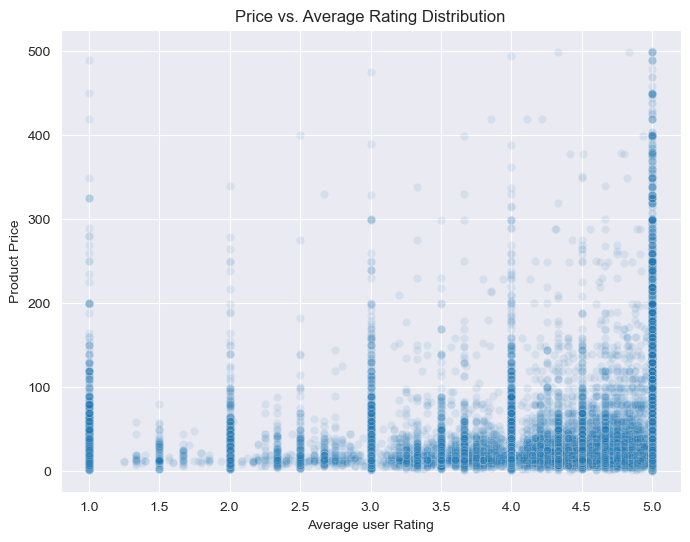

In [26]:
# Plot scatterplot of Price vs. Average Rating
sns.scatterplot(x='rating_by_user', y='price', data=user_df.groupby('product_id')[['rating_by_user','price']].mean(),alpha=0.1)  

plt.title('Price vs. Average Rating Distribution')  
plt.xlabel('Average user Rating')  
plt.ylabel('Product Price')  

plt.show()

**Scatter plot of Price vs Average Rating** : The scatter plot indicates that there is not a clear trend between the price of an item and the rating given by the user. While more data points appear in the high rating–high price region compared to the low rating–high price area, this may simply be due to the skewness in the dataset towards high ratings.

In [27]:
# Filter categories with decent number of items to visualize trends
relevant_categories = meta_df[['sub_category_1','sub_category_2']].value_counts().loc[lambda x: x > 100].index.to_list()

#Filter rows in the dataframe containing relevant categories
sub_df = user_df[user_df.apply(lambda row: (row['sub_category_1'],row['sub_category_2']) in relevant_categories,axis=1)]

#overall average_rating for the broad category
cat_mean_rating = meta_df.groupby('sub_category_1')['average_rating'].mean().to_dict()      

#overall_median_rating_number = sub_df['rating_number'].median()   #overall median of rating_number

# Calculate relative deviation from the mean rating 
sub_df['pct_deviation_from_mean_rating'] = (sub_df['rating_by_user'] - sub_df['sub_category_1'].map(cat_mean_rating)) / sub_df['sub_category_1'].map(cat_mean_rating)


In [28]:
#Relative Ratings per category

df = sub_df.groupby(['sub_category_1','sub_category_2'])[['pct_deviation_from_mean_rating']] \
     .mean().round(2).sort_values(by=['sub_category_1','pct_deviation_from_mean_rating'],ascending=[True,False])

print(df.describe())


# Initialize the Styler object
styled_df = df.style.format("{:.2f}")  # Format all columns to 2 decimal places

# Apply bar styling
styled_df.bar(
        align='mid', 
        color=['#d65f5f','#5fba7d'],  # Green color for positive values
        vmin=-0.15,  # Set vmin for the column
        vmax=0.06   # Set vmax for the column
    )

# Display the styled DataFrame
styled_df

# Exporting the styled DataFrame to PNG
#dfi.export(styled_df, 'styled_df.png')



       pct_deviation_from_mean_rating
count                       61.000000
mean                         0.003770
std                          0.039882
min                         -0.140000
25%                         -0.010000
50%                          0.010000
75%                          0.030000
max                          0.070000


**In a given category, which subcategory has the most unsatisfied users?**
The styled cross-tab above helps visualize the percentage of user reviews that significantly deviate from the mean rating of a particular category. For example, the mean rating of *Body Jewelry* is 14% lower than that of the broader *Jewelry* category, indicating that users in this subcategory are less satisfied with *Body Jewelry* compared to the average satisfaction level for *Jewelry* as a whole.
This information can help businesses improve products, refine marketing, optimize inventory and enhance customer support by identifying subcategories with lower satisfaction.

### <a id='toc1_1_4_'></a>[Exploring New Features](#toc0_)

We build a tokenizer to process our review text data. The tokenizer will remove punctuation, set to lowercase, split into words, remove blanks and stop words.

In [29]:
# Create a tokenizer function that removes punctuation, converts text to lowercase, 
# filters out stopwords, and applies stemming to each word.

def tokenizer(sentence):
    """
    Tokenizes a given sentence by:
    - Removing punctuation and converting to lowercase.
    - Splitting the sentence into words.
    - Removing stopwords and empty tokens.
    - Applying stemming to the remaining words.

    Args:
        sentence (str): The input text to be tokenized.

    Returns:
        list: A list of processed, stemmed words.
    """
    # Remove punctuation and convert to lowercase
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark, '').lower()

    # Split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []

    #Instantiate PorterStemmer
    stemmer = PorterStemmer()
     
    # Remove stopwords and apply stemming
    for word in listofwords:
        if (word not in ENGLISH_STOP_WORDS) and (word != ''):
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [30]:
#Adding new features to the dataset which could be useful for analysis

#Calculating length of review after tokenization
user_df['review_length'] = user_df['text_review'].apply(tokenizer).apply(len) 

#Calculating product age
user_df['product_age'] = (user_df.groupby('product_id')['time_of_review'].transform(lambda x: x.max())- user_df['date_first_available']).dt.days

#Calculating verified_purchase_ratio
user_df['verified_purchase_ratio'] = user_df.groupby('product_id')['verified_purchase'].transform(lambda x: x.sum())/user_df['rating_number']

#Calculating helpful_vote_ratio
user_df['helpful_vote_ratio'] = user_df.groupby('product_id')['helpful_vote'].transform(lambda x: x.sum())/user_df['rating_number']


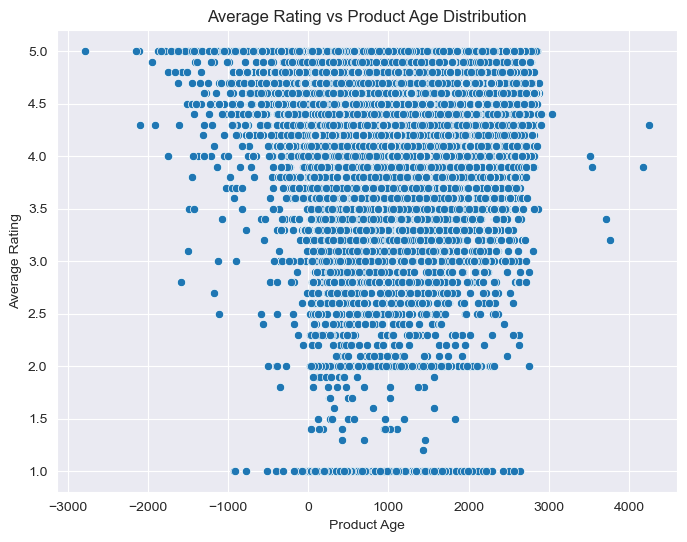

In [31]:
# Plot scatterplot of Product Age vs. Average Rating
sns.scatterplot(x='product_age', y='average_rating', data=user_df)  

plt.title('Average Rating vs Product Age Distribution')  
plt.xlabel('Product Age')  
plt.ylabel('Average Rating')  

plt.show()

The first noticeable issue is the presence of negative product ages. This could indicate that the product listing was updated, possibly due to a new version being released. Additionally, there is no clear trend between product age and ratings—older products on the platform do not necessarily have higher ratings, further supporting our hypothesis that the date first available might not truly represent when the product was first listed on Amazon.

In [32]:
#checking reviews for negative product ages
negative_age_df = user_df[user_df['product_age'] < 0].reset_index(drop=True)
negative_age_df[['text_review','review_length','date_first_available', 'Date First Available','time_of_review','product_age','product_id', \
                'rating_by_user','helpful_vote']].sort_values(by = 'helpful_vote',ascending=False).head()

,text_review,review_length,date_first_available,Date First Available,time_of_review,product_age,product_id,rating_by_user,helpful_vote
2288,"After 2 months, this bracelet looks horrible. ...",8,2023-05-06,"May 6, 2023",2018-08-30 21:27:53.479,-101,B06XWQNQFS,1,80
2236,Mi bebé uso está pulsera por una semana y camb...,25,2023-05-06,"May 6, 2023",2019-07-09 01:01:35.594,-101,B06XWQNQFS,1,51
1258,This is not gold. Look what it did to my finger!,4,2023-04-10,"April 10, 2023",2018-06-23 02:57:35.670,-261,B01DEA1SD0,1,50
2458,"Very disappointed, name is not centered, no de...",9,2023-05-06,"May 6, 2023",2017-07-27 20:49:29.519,-101,B06XWQNQFS,1,46
1531,"I love it! It's dainty but sturdy, which is ex...",5,2022-09-05,"September 5, 2022",2018-04-24 05:16:11.340,-239,B01KQXCWZG,5,39


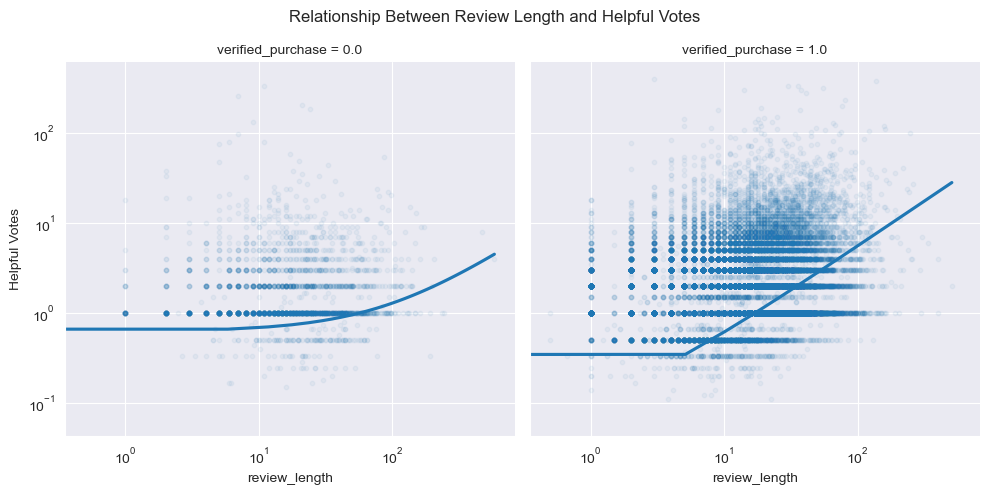

In [33]:
#plot bar plot between review_length and helpful_vote

mean_df = user_df.groupby(['user_id','verified_purchase'])[['verified_purchase','review_length','helpful_vote']].mean()

g = sns.lmplot(x = 'review_length', y = 'helpful_vote', data = mean_df ,col = 'verified_purchase',
           facet_kws=dict(sharex=True, sharey=True),scatter_kws={'alpha': 0.05,'s':10},ci = None)

# Get the current figure and change to log scale
for ax in g.axes.flat:  
    ax.set_xscale("log")  
    ax.set_yscale("log")  

# Set title and labels
plt.suptitle("Relationship Between Review Length and Helpful Votes")

# Set y-label only for the left plot
g.axes[0, 0].set_ylabel("Helpful Votes")

plt.tight_layout()
plt.show()

**Helpful Votes vs Review Length** : The plot reveals a strong positive relationship between review length and helpful votes for verified purchases, indicating that longer reviews tend to receive more helpful votes.

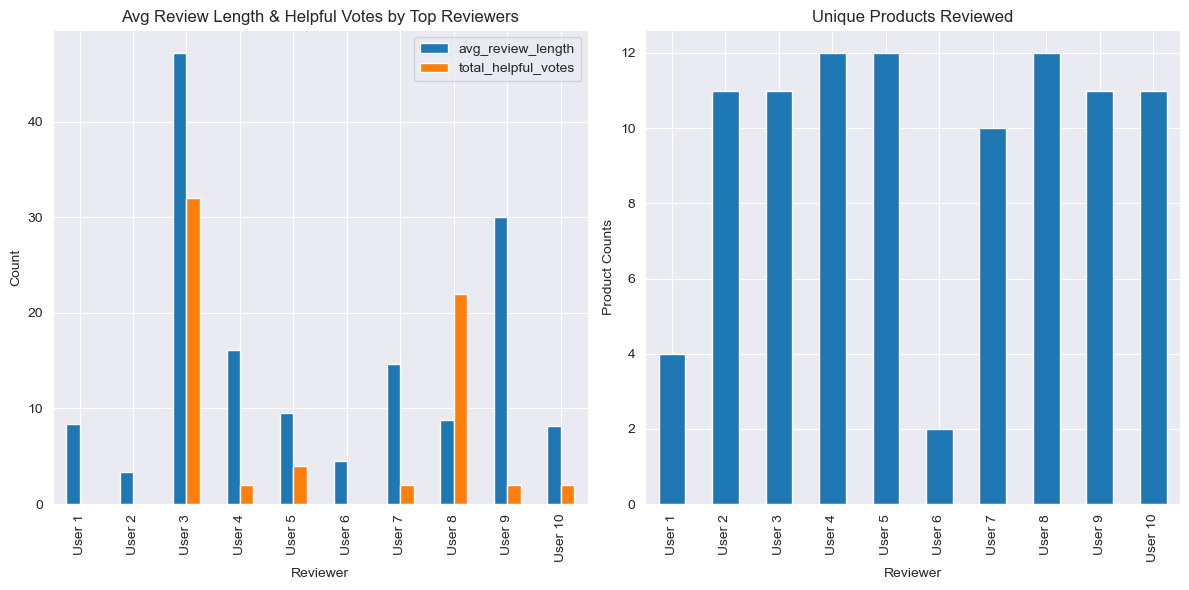

In [34]:
# Plot bar plot of review characteristics for the top 10 most active reviewers

# Identify the top 10 reviewers based on the number of reviews they have written
top10_reviewers = user_df['user_id'].value_counts().index.to_list()[:10] 

# Filter the dataset to include only reviews from these top reviewers
df = user_df[user_df['user_id'].isin(top10_reviewers)] 

# Define an aggregation mapping for summarizing reviewer activity
agg_map = {
    'rating_by_user': ['mean', 'count'],  # Mean rating given and total number of ratings
    'helpful_vote': 'sum',  # Total number of helpful votes received
    'parent_asin': 'nunique',  # Number of unique products reviewed
    'review_length': 'mean',  # Average length of reviews
    'store': 'nunique'  # Number of unique stores reviewed
           }

#Create grouped dataframe summarizing activity per reviewer
grouped_df = df.groupby('user_id')[['rating_by_user','helpful_vote','parent_asin','review_length','store']].agg(agg_map)

# Rename columns for clarity
grouped_df.columns = [
    'avg_rating_given', 'total_reviews',  # From 'rating_by_user'
    'total_helpful_votes',  # From 'helpful_vote'
    'unique_products_reviewed',  # From 'parent_asin'
    'avg_review_length',  # From 'review_length'
    'unique_stores_reviewed'  # From 'store'
]

# Create aliases for user IDs (e.g., "User 1", "User 2", etc.)
grouped_df['user_alias'] = ['User ' + str(i+1) for i in range(len(grouped_df))]

# Set the alias as the index for plotting
grouped_df.set_index('user_alias', inplace=True)

#Define canvas
fig,ax = plt.subplots(1,2,figsize=(12,6))

# Plot total helpful votes and average review length per top reviewer
grouped_df[['avg_review_length', 'total_helpful_votes']].plot(kind='bar', ax=ax[0])
ax[0].set_title('Avg Review Length & Helpful Votes by Top Reviewers')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Reviewer')

# Plot unique products reviewed per top reviewer
grouped_df['unique_products_reviewed'].plot(kind='bar', ax=ax[1])
ax[1].set_title('Unique Products Reviewed')
ax[1].set_ylabel('Product Counts')
ax[1].set_xlabel('Reviewer')

plt.tight_layout()
plt.show()

In [35]:
grouped_df.sort_values(by=['avg_rating_given','total_helpful_votes','unique_stores_reviewed'],ascending=[False,True,True])

,avg_rating_given,total_reviews,total_helpful_votes,unique_products_reviewed,avg_review_length,unique_stores_reviewed
user_alias,,,,,,
User 2,5.000000,11,0,11,3.363636,1
User 6,5.000000,12,0,2,4.500000,1
User 10,5.000000,11,2,11,8.181818,4
User 7,5.000000,10,2,10,14.700000,5
User 5,5.000000,12,4,12,9.500000,9
User 8,5.000000,12,22,12,8.833333,9
User 4,4.923077,13,2,12,16.076923,11
User 1,4.800000,10,0,4,8.400000,3
User 9,4.363636,11,2,11,30.000000,8


#### <a id='toc1_1_4_1_'></a>[Analysis of Top 10 Reviewers](#toc0_)

- **High Average Rating**: Consistent with the overall dataset, most reviewers have given an average rating of 5, indicating consistently positive reviews.
- **Low Helpful Votes**: Many of the reviews have received very few helpful votes (some with 0 or just a few). This could suggest that the reviews are not considered particularly useful by other users.
- **Limited Store Diversity**: Several reviewers have only reviewed a small number of stores, with some reviewing just one store.
- **Short Review Length**: Some reviews have very short lengths, which could suggest that the reviews are either automated or written hastily. Fake reviews often lack depth and are typically brief.
  
These patterns could potentially suggest the presence of fake reviews, as low helpful votes combined with a high average rating and limited store reviews are often characteristics of reviews created to artificially inflate product or seller ratings. However, a deeper analysis is needed to confirm this hypothesis.

In [36]:
#Splitting dataframes for categorical and numeric columns

user_df_cat = user_df.select_dtypes(include="O")

user_df_numeric = user_df.select_dtypes(include=["number","bool"])

print(f'The categorical columns in the combined dataset are {user_df_cat.columns.tolist()}.')

print(f'The numeric columns in the combined dataset are {user_df_numeric.columns.tolist()}.')

The categorical columns in the combined dataset are ['title_review', 'text_review', 'product_id', 'parent_asin', 'user_id', 'main_category', 'title_product', 'features', 'description', 'store', 'sub_category_1', 'sub_category_2', 'sub_category_3', 'combined_category', 'Date First Available', 'package_dimensions_inches', 'department'].
The numeric columns in the combined dataset are ['rating_by_user', 'helpful_vote', 'verified_purchase', 'average_rating', 'rating_number', 'price', 'package_weight_ounces', 'package_length_inches', 'package_width_inches', 'package_height_inches', 'mean_user_rating', 'highly_rated_item', 'review_length', 'product_age', 'verified_purchase_ratio', 'helpful_vote_ratio'].


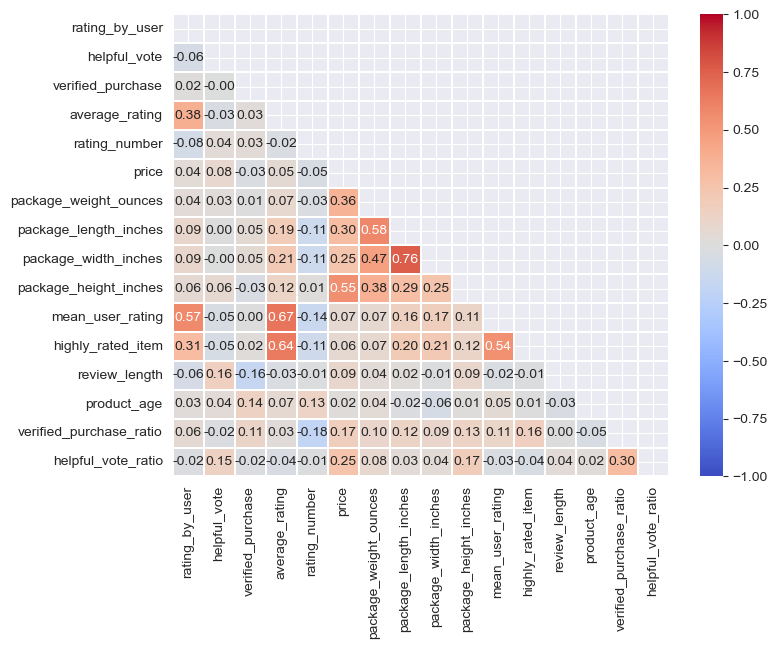

In [37]:
#compute pearson r correlation matrix for numeric variables
df_corr = user_df_numeric.corr() 

# Create an upper triangular mask for better readability of the heatmap
mask = np.triu(np.ones(df_corr.shape)) 

#plot the heatmap using seaborn
sns.heatmap(df_corr,
            vmin=-1,vmax=+1,
            mask=mask,
            annot=True,
            cmap="coolwarm", fmt=".2f",
            linewidths=0.2)  

plt.show()

In [38]:
df_corr['highly_rated_item'].drop(['average_rating','rating_number','highly_rated_item','rating_by_user'])

helpful_vote              -0.052333
verified_purchase          0.021683
price                      0.063292
package_weight_ounces      0.073894
package_length_inches      0.200378
package_width_inches       0.211325
package_height_inches      0.116886
mean_user_rating           0.539543
review_length             -0.014867
product_age                0.005035
verified_purchase_ratio    0.163171
helpful_vote_ratio        -0.040955
Name: highly_rated_item, dtype: float64

**Correlation Heatmap**: Most of the variables do not show a strong correlation with our target variable, `highly_rated_item`. In our future analysis, we will explore feature engineering to create new variables that could serve as better predictors for our target.

### <a id='toc1_1_5_'></a>[Conclusion](#toc0_)

In this notebook, we explored the relationships between different variables in our dataset through preliminary EDA. To further enhance our analysis, we plan to:  

- Include dummy variables for different subcategories, as they might serve as important predictors.  
- Vectorize text data, including review text, review title, product title, and product description columns.  
- Apply feature engineering techniques to create more meaningful features.  
- Build a baseline model using Logistic Regression to predict whether an item is highly rated or not.  
